# Midterm Exam
# MSBA 206
# Prof. Min Li

<pre>You must sign this Honor Code Statement before taking the Exam:  

I, Samuel Wolfe, agree to neither give nor receive any help on this exam from any other student or person. I understand that providing answers to questions on this exam to any other student or person is an academic misconduct violation as is taking or receiving answers to questions on this exam from any other student or person. I understand that use of any source or communication via the internet or network (including discord message, text message, email, online search) on this exam is an academic misconduct violation. It is important to me to be a person of integrity and that means that ALL ANSWERS on this exam are my answers based on the DMBA textbook and materials provided by Prof. Min Li only. I understand any academic misconduct violation will be dealt with following Academic Honesty Policy and Procedure. 

Signed Samuel Wolfe (Type your name here as your signature) </pre>

In [30]:
# import required functionality for this chapter
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.formula.api as sm

import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score #, BIC_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.metrics import accuracy_score, roc_curve, auc
%matplotlib inline

In [31]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`

DATA = Path('C:/Users/Sam/Downloads/Midterm')

# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

Answer the following questions using Python.<p>
The file _BostonHousing.csv_ contains information collected by the US Bureau of the Census concerning housing in the area of
Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price (MEDV). Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA). The attributes are deﬁned as follows: 
<pre>
CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town
LSTAT: Percentage lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
</pre>




In [32]:
# load the data
housing_df = pd.read_csv(DATA / 'BostonHousing.csv')
# display column/variable names
columns = list(housing_df.columns)
print("Variables in the data are: ")
print(columns)
# review first 5 records in the data
print("\nFirst 5 records in the data are:")
housing_df.head()

Variables in the data are: 
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV']

First 5 records in the data are:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


1. Compute the correlation (map displaying all correlation coefficients) for the numerical predictors and search for highly correlated pairs. These have potential redundancy and can cause multicollinearity. Choose which ones to remove based on this table.

CAT. MEDV    0.79
RM           0.70
ZN           0.36
DIS          0.25
CHAS         0.18
AGE         -0.38
RAD         -0.38
CRIM        -0.39
NOX         -0.43
TAX         -0.47
INDUS       -0.48
PTRATIO     -0.51
LSTAT       -0.74
Name: MEDV, dtype: float64


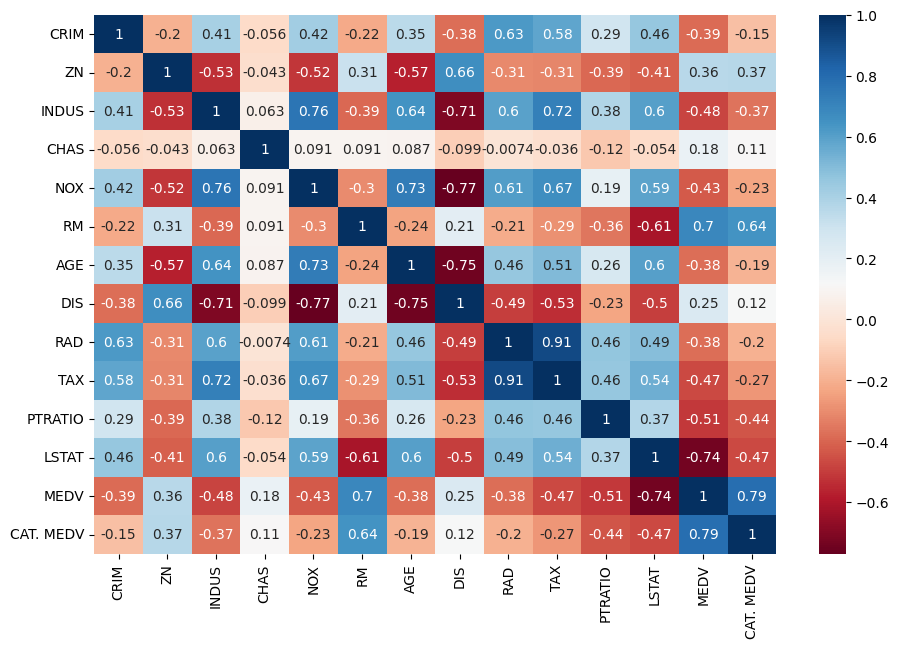

In [33]:
targetVar = 'MEDV'
dfHousingCorr = housing_df.corr(numeric_only=True)
dfHousingCorrTgta = dfHousingCorr.loc[targetVar].sort_values(ascending=False)
dfHousingCorrTgta = dfHousingCorrTgta[dfHousingCorrTgta < 1]
print(dfHousingCorrTgta.round(2))
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(dfHousingCorr, annot=True, xticklabels=dfHousingCorr.columns, yticklabels=dfHousingCorr.columns, cmap='RdBu')
housing_keepers = ['CAT. MEDV','RM','PTRATIO','LSTAT']

2. Find the number of neighborhoods that bound the Charles River vs. those that do not.

In [34]:
TBound = housing_df.CHAS.value_counts()
print(TBound)

CHAS
0    471
1     35
Name: count, dtype: int64


3. Group the numerical predictor RM (the average number of rooms per dwelling in the neighborhood) into bins of size 1 (0-1, 1-2, etc.). Compute the average of MEDV by (binned) RM and CHAS using the groupby method. 

In [35]:
housing_df['RM_bin'] = pd.cut(housing_df.RM, range(0, 10), labels=False)
housing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()


RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

4. Compute the average of MEDV by (binned) RM and CHAS using the the pivot_table() method.  

In [36]:
pd.pivot_table(housing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


5. Why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?

Training is used to create the model. We then validate the model with the validation and test data so we can ensure our chosen model works correctly.

6. Partition the data into training (60%) and validation (40%) sets using random_state=1. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

In [37]:
# partition data
predictors = ['CRIM','CHAS','RM']
X = pd.get_dummies(housing_df[predictors], drop_first=True)
y = housing_df[targetVar]

Train_X, Valid_X, Train_y, Valid_y = train_test_split(X, y, test_size=0.6, random_state=1)
model1 = LinearRegression()
model1.fit(Train_X,Train_y)

print('intercept ', model1.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': model1.coef_}))

best_lm_pred = model1.predict(Valid_X[predictors])



intercept  -27.882233077008493
  Predictor  coefficient
0      CRIM    -0.237763
1      CHAS     2.564264
2        RM     8.185345


7. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

In [38]:
house7 = {'CRIM':[0.1],'CHAS':[0],'RM':[6]}
dfhouse7 = pd.DataFrame(data=house7)
seven_lm_pred = model1.predict(dfhouse7[predictors])
result = pd.DataFrame({'Predicted': seven_lm_pred})
print(result.head(1))

   Predicted
0  21.206061


8. To evaluate predictive accuracy using the validation data, find average error, RMSE, gains and decile lift charts. Explain what these measures tell us.


Regression statistics

                      Mean Error (ME) : -0.5744
       Root Mean Squared Error (RMSE) : 6.1000
            Mean Absolute Error (MAE) : 4.3284
          Mean Percentage Error (MPE) : -11.5702
Mean Absolute Percentage Error (MAPE) : 24.7305


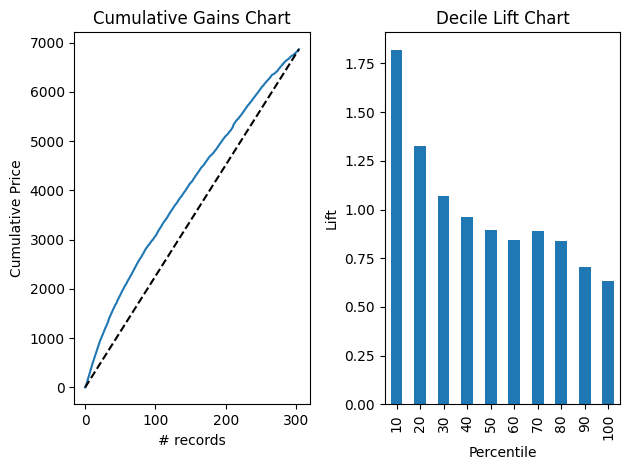

In [39]:
resultPred = pd.DataFrame({'Predicted': best_lm_pred, 'Actual': Valid_y})
regressionSummary(Valid_y, best_lm_pred)
resultPred = resultPred.sort_values(by=['Predicted'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(resultPred['Actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(resultPred['Actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

9. The question is independent of the previous questions. The data frame "df" below contains a small set of predictive model validation results for a classification model, with both actual values and propensities. Calculate error rates, sensitivity, and specificity using cutoffs of 0.25, 0.5, and 0.75. Create the gains and decile lift charts.

In [40]:
data = {'Probability_Y_Equal1': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 
                       0.29, 0.08, 0.02],
        'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]}

# convert to data frame
df = pd.DataFrame(data)
df = df.sort_values(by=['Probability_Y_Equal1'], ascending=False)

#all of the groundwork for 5.7 is done here. Specific outputs are separated below.
#establish cuttoff values
cutoff1 = 0.25
cutoff2 = 0.5
cutoff3 = 0.75

#pulling actual results
act = df.Actual.tolist()
#Cutoff of 0.25
predC1 = [1 if p > cutoff1 else 0 for p in df.Probability_Y_Equal1]
#Cutoff of 0.5
predC2 = [1 if p > cutoff2 else 0 for p in df.Probability_Y_Equal1]
#Cutoff of 0.75
predC3 = [1 if p > cutoff3 else 0 for p in df.Probability_Y_Equal1]
#building matrix
cmC1 = metrics.confusion_matrix(act, predC1)
cmC2 = metrics.confusion_matrix(act, predC2)
cmC3 = metrics.confusion_matrix(act, predC3)

#accuracy to error
errC1 = round(1 - metrics.accuracy_score(act, predC1),2)
errC2 = round(1 - metrics.accuracy_score(act, predC2),2)
errC3 = round(1 - metrics.accuracy_score(act, predC3),2)

#sensitivity 
senC1 = round(metrics.recall_score(act, predC1),2)
senC2 = round(metrics.recall_score(act, predC2),2)
senC3 = round(metrics.recall_score(act, predC3),2)

#specificity
spcC1 = round(metrics.recall_score(act, predC1,pos_label=0),2)
spcC2 = round(metrics.recall_score(act, predC2,pos_label=0),2)
spcC3 = round(metrics.recall_score(act, predC3,pos_label=0),2)

In [41]:
#results
#C1
print('Cutoff value of ', cutoff1)
print('Error Rate: ', errC1)
print('Sensitivity: ', senC1)
print('Specificity: ', spcC1)
classificationSummary(df.Actual, predC1, class_names=(0,1))

Cutoff value of  0.25
Error Rate:  0.4
Sensitivity:  1.0
Specificity:  0.53
Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3


In [42]:
#results
#C2
print('Cutoff value of ', cutoff2)
print('Error Rate: ', errC2)
print('Sensitivity: ', senC2)
print('Specificity: ', spcC2)
classificationSummary(df.Actual, predC2, class_names=(0,1))

Cutoff value of  0.5
Error Rate:  0.1
Sensitivity:  1.0
Specificity:  0.88
Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3


In [43]:
#results
#C3
print('Cutoff value of ', cutoff3)
print('Error Rate: ', errC3)
print('Sensitivity: ', senC3)
print('Specificity: ', spcC3)
classificationSummary(df.Actual, predC3, class_names=(0,1))

Cutoff value of  0.75
Error Rate:  0.05
Sensitivity:  0.67
Specificity:  1.0
Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2
